In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Gradient Decent**

**Train dataset for linear regression**

printing data

      x          y
0    24  21.549452
1    50  47.464463
2    15  17.218656
3    38  36.586398
4    87  87.288984
..   ..        ...
694  58  58.595006
695  93  94.625094
696  82  88.603770
697  66  63.648685
698  97  94.975266

[699 rows x 2 columns]


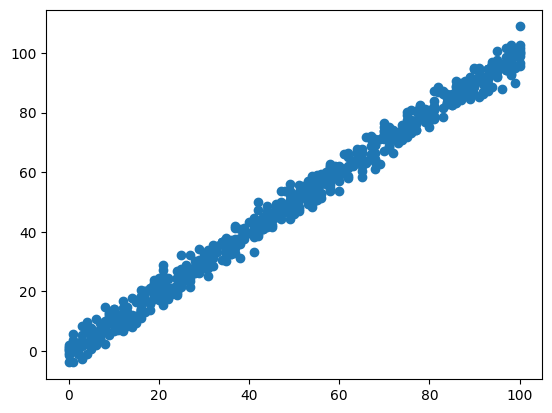

In [ ]:
input_csv_path='/content/drive/MyDrive/Colab Notebooks/Train_single_variable_linear_regression.csv'
csv_file=pd.read_csv(input_csv_path)
print(csv_file)
csv_file.shape
plt.scatter(csv_file.iloc[:,0:1],csv_file.iloc[:,1:])
plt.show()

Training train data

Loss Function Values: [2705.5272204752473, 305.4522576488098, 40.698318397611864, 11.493126788644643, 8.271481402155205, 7.916099076122104, 7.876896222370395, 7.872571346208765, 7.872093884057834, 7.872040832861362, 7.872034598770842, 7.8720335291461545]
Bias Values: [0.01, 0.018985687711058644, 0.021965731653654327, 0.022951118107011923, 0.02327401811053988, 0.023376886351106893, 0.02340667554283984, 0.023412193170045947, 0.023409649688840125, 0.023404429086756755, 0.02339831955047275, 0.023391914991383985]
Weights: [0.1, 0.7002129283486285, 0.8995620380217191, 0.9657720310715959, 0.9877624574001436, 0.9950662151454213, 0.9974920817179693, 0.9982978516572794, 0.9985655380234232, 0.9986545103984826, 0.9986841263958655, 0.9986940283241829]


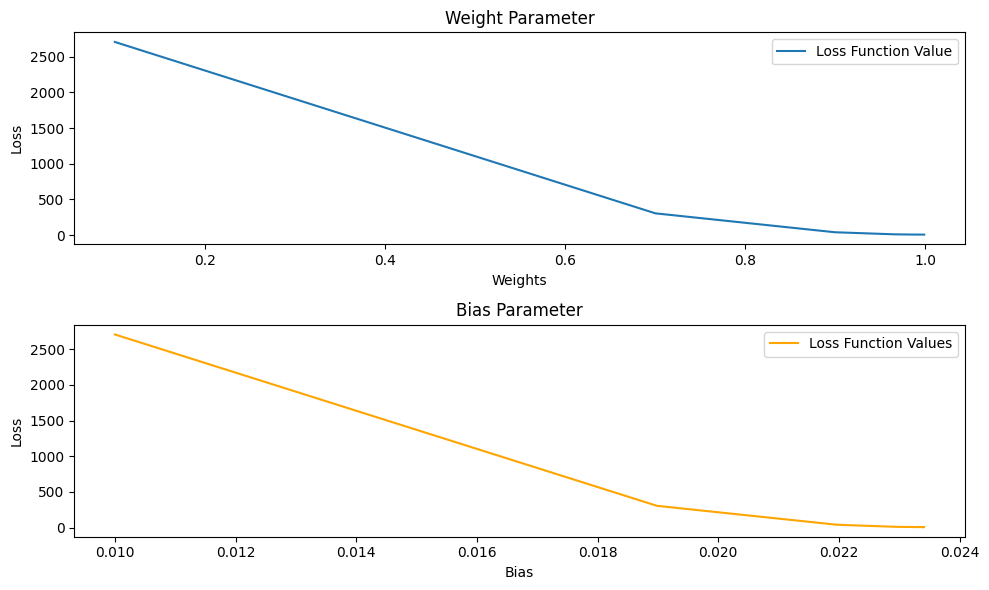

The Final Loss Function Value on Test Data is :  9.459256761211432


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

csv_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_single_variable_linear_regression.csv')
x_data = np.array(csv_file['x'])
y_data = np.array(csv_file['y'])


iterations = 1000 # iteration
weight = 0.1
bias = 0.01
learning_rate = 0.0001  # learning rate
previous_loss_function = None
threshold = 1e-6

loss_function_values = []
bias_values = []
weights = []

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

while iterations != 0:
    # Predict using current weights and bias
    y_pred = (x_data * weight) + bias

    # Check how far from the true value using the loss function
    error = loss_function(y_data, y_pred)

    # If the difference between loss function now and the last loss function is low, then exit
    if previous_loss_function is not None:
        if abs(previous_loss_function - error) <= threshold:
            break

    previous_loss_function = error
    loss_function_values.append(error)
    bias_values.append(bias)
    weights.append(weight)

    # Calculating the gradients
    weight_derivative = (2/x_data.shape[0]) * sum(x_data * (y_pred-y_data))
    bias_derivative = (2/x_data.shape[0]) * sum(y_pred-y_data)

    # Updating weights and bias
    weight = weight - (learning_rate * weight_derivative)
    bias = bias - (learning_rate * bias_derivative)

    iterations -= 1

print("Loss Function Values:", loss_function_values)
print("Bias Values:", bias_values)
print("Weights:", weights)

# Plotting results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(weights,loss_function_values, label='Loss Function Value')
plt.xlabel('Weights')
plt.ylabel('Loss')
plt.title('Weight Parameter')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bias_values,loss_function_values, label='Loss Function Values', color='orange')
plt.xlabel('Bias')
plt.ylabel('Loss')
plt.title('Bias Parameter')
plt.legend()

plt.tight_layout()
plt.show()


# TESTING
csv_file_2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_single_variable_linear_regression.csv')
x_test_data=csv_file_2['x']
y_test_data=csv_file_2['y']

y_pred_data=(weight*x_test_data)+bias
print("The Final Loss Function Value on Test Data is : ",loss_function(y_test_data,y_pred_data))

accuracy of the parameters on test data

In [ ]:
test_csv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_single_variable_linear_regression.csv')
x_test=test_csv['x']
y_test=test_csv['y']

y_pred=x_test*weight+bias

error=np.mean((y_pred-y_test)**2)
print(error)

9.459256761211432


**Boston Dataset for multivariable linear regression**

x_train.shape: (379, 12)
x_test.shape: (127, 12)
y_train.shape: (379, 1)
y_test.shape: (127, 1)
The number of training points in one epoch is  379
Enter the batch size for updating the weights and bias:10
Enter the number of epochs:500
EPOCH:  1
EPOCH:  101
EPOCH:  201
EPOCH:  301
EPOCH:  401
[2127.113162881809, 698.4734836825921, 501.47016955337165, 139.37441997444455, 109.2504002464974, 219.314054109879, 172.64820806930248, 183.06094100231346, 217.35724402434113, 181.6159449537616, 188.87305530842366, 110.67461859021873, 326.8889920068274, 335.99817690602816, 192.54126607727719, 90.88449047892391, 139.55400652971275, 232.51204926344963, 85.8915749271083, 236.57181150717034, 258.80592765617956, 78.99046710060358, 328.2211654660546, 100.21810987427082, 77.43949090222029, 202.48057483168878, 195.28258527816584, 160.48218041385593, 170.38388558025068, 212.30773241899874, 57.39017091825, 217.4411284751543, 313.1562648830597, 234.77934640730297, 96.0834260117895, 291.82502854391566, 126.00

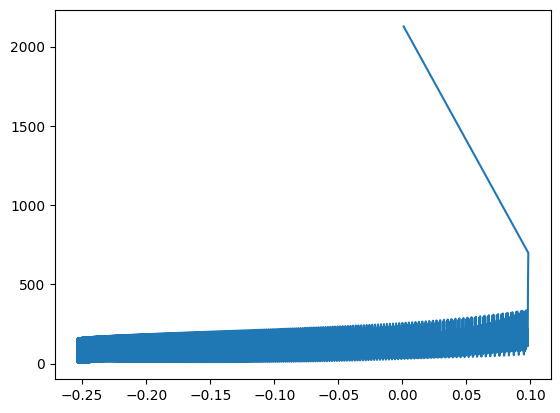

The Final Loss Function Value on Testing is : 61.91742520352675


In [ ]:
#Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Input the file and creating training and testing data
csv_file=pd.read_csv('/content/drive/MyDrive/Boston.csv')

x_data=csv_file.iloc[:,1:-1]
y_data=csv_file.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,random_state=104,test_size=0.25,shuffle=True)

print("x_train.shape:",x_train.shape)
print("x_test.shape:",x_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

#Initialize the weights and bias
x_col_names=x_train.columns
weights=np.ones([1,x_col_names.shape[0]])*0.1
bias=0.005
learning_rate=0.000001
loss_function_values=[]

#input the batch size and epochs
print("The number of training points in one epoch is ",x_train.shape[0])
batch_size=int(input("Enter the batch size:"))
epochs=int(input("Enter the number of epochs:"))
# threshold=0.000005 we cant reach to threshold in boston
weight1=[0.001]

#make a function for the losses or costs
def loss_function(y_pred,y_true):
  return np.mean((y_true-y_pred)**2)


################################## TRAINING
#Training the model
for i in range(epochs):
  curr=1
  if((i+1)%100==0):
    print("EPOCH: ",i+1)
  while[True]:
    toggle=False  #This is for breaking when the batches are over

    #creating the batch data for prediction
    if ((x_train.shape[0]-curr)<=batch_size):
      x_batch=x_train.iloc[curr-1:,:]
      y_batch=y_train.iloc[curr-1:,:]
      toggle=True
    else:
      x_batch=x_train.iloc[curr-1:curr+batch_size-1,:]
      y_batch=y_train.iloc[curr-1:curr+batch_size-1,:]
      curr=curr+batch_size
    #Data for prediction created

    #Predicted data for a batch
    y_pred=(np.dot(x_batch,weights.T))+bias
    loss_function_values.append(loss_function(y_pred,y_batch))

    # Calculate gradients for weights and bias
    residuals = y_batch-y_pred
    weight_gradients = -2 * np.mean(residuals.values * x_batch.values, axis=0)
    bias_gradient = -2 * np.mean(residuals)

    # Update weights and bias
    weights = weights - (learning_rate * weight_gradients.reshape(1, -1))
    bias = bias - (learning_rate * bias_gradient)
    weight1.append(weights[0,0])

    #Breaking when the batches are over
    if (toggle):
      break

#Printing the final values
print(loss_function_values)
print("Final Weights:")
print(weights)
print("Final Bias:")
print(bias)
plt.plot(weight1[:-1],loss_function_values)
plt.show()

################################### TESTING
#finally test using test values
y_pred=np.dot(x_test,weights.T)
print("The Final Loss Function Value on Testing is :",loss_function(y_pred,y_test))
#use sklearn.metrics to check the accuracy of the boston dataset

**Normal equation method**

boston

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/Boston.csv')
n = train_data.shape[0]

def normal_equation(X, y):
    X = np.column_stack((np.ones(n), X))
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)   #( Xt * X )-1 * ( Xt Y ) # may need pseudo inverse

X_train = train_data.iloc[:, 1:-1].values
y_train = train_data.iloc[:, -1].values

beta = normal_equation(X_train, y_train)

print("Estimated parameters:")
print(f"Intercept: {beta[0]}")
for i in range(1, len(beta)): # only 1 value printed
    print(f"para{i} (Coefficient {i}): {beta[i]}")

Estimated parameters:
Intercept: 41.61727017593546
para1 (Coefficient 1): -0.12138861842282266
para2 (Coefficient 2): 0.04696346329979682
para3 (Coefficient 3): 0.013467694669174949
para4 (Coefficient 4): 2.8399933827279376
para5 (Coefficient 5): -18.758022005243703
para6 (Coefficient 6): 3.6581190417804206
para7 (Coefficient 7): 0.0036107105470948495
para8 (Coefficient 8): -1.490753650079532
para9 (Coefficient 9): 0.2894045206208711
para10 (Coefficient 10): -0.012681981258359646
para11 (Coefficient 11): -0.9375328998393389
para12 (Coefficient 12): -0.5520191011638232
